# Exercise Sheet 8 

## Exercise 30

Implement a simulation of a galton board with n = 2 layers: from the top, a ball
runs onto the first nail and subsequently to the left or the right, each time onto a
second nail. If the ball runs twice left from the nail, it drops into container B0 . If the
ball runs one time left and then right or vice versa, it drops into container B1 . All
other balls drop into container B2 . In total N = 100 balls are rolled. The expected
number of balls follows (based on the linearity of the expectation value) a binominal
distribution multiplied with the number N 


Therefore, the direction of the ball at a nail to the right is considered as ’success’
and their number counted to compute container k, into which the ball drops. Which
statistical test finds here its correct application and can the test reliably recognise a
skewed first nail, which directs the ball in 60% to the left (5% level of significance)?

In [1]:
import pandas as pd
import numpy as np
import math
import scipy.stats as stats
import scipy.special
import random
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, shapiro, wilcoxon, binomtest

In [2]:
# Hitting a nail is like tossing a coin
def hitNail():
    return random.randint(1, 2)

In [3]:
#
def hitNailSkewed():
    return np.random.binomial(1, 0.6, size=None)

In [4]:
# Simulate the path through the galton board with 2 layers
def simu():
    Nail1 = hitNail()
    #Nail1 = hitNailSkewed()
    Nail2 = hitNail()

    if Nail1 == 1 and Nail2 == 1:
        return 0
    elif Nail1 == 1 and Nail2 == 2:
        return 1
    elif Nail1 == 2 and Nail2 == 1:
        return 1
    else:
        return 2

(array([20., 56., 24.]),
 array([0., 1., 2., 3.]),
 <BarContainer object of 3 artists>)

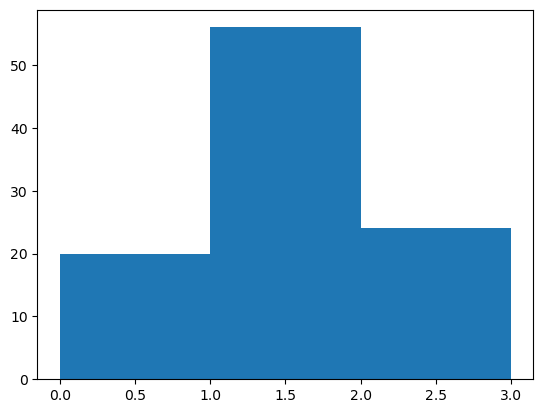

In [5]:
def control(times):
    sample = [simu() for _ in range(times)]
    return sample

# Run simulation for 100 times and count occurences
n = 100
data = control(n)
plt.hist(data, bins=np.arange(0,4))

In [6]:
H0 = "The data is not normal distributed"
H1 = "H0 (no normal distribution) does not apply."

k = data.count(1) + data.count(2)
p = (scipy.special.comb(2, 1, exact=True) * pow(0.5, 1) * pow(0.5, 2-1)) + \
    (scipy.special.comb(2, 2, exact=True) * pow(0.5, 2) * pow(0.5, 2-2))

# Perform the Binomial Test
p_value = binomtest(k, n, p).pvalue

# Set the significance level
significance_level = 0.05
print('p = %.8f' % p_value)

# Compare the p-value with the significance level
if p_value < significance_level:
    print('H0 (' + H0 + ') has been rejected in favour of H1 (' + H1 + ').') 
else:
    print('H0 (' + H0 + ') has not been rejected.')

p = 0.29837210
H0 (The data is not normal distributed) has not been rejected.
